### Revisiting the MSTI data after re-pipelining a second time post 

Prepared by: Grace Patlewicz <br>
Last modified: 26 January 2023 <br>
Modifications: Adjusting chart titles and axis in response to reviewer comments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
import openpyxl

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


#### Reading in the sc2 msti  data

In [4]:
xls = pd.read_excel(processed_dir+'MSTI_invitrodb_01Nov2021_GP.xlsx', sheet_name = None)

In [5]:
xls.keys()

dict_keys(['comparison_of_all', 'sc2', 'sc1', 'sc0', 'simmons_pilot', 'aeid_table'])

In [6]:
sc2 = pd.read_excel(processed_dir+'MSTI_invitrodb_01Nov2021_GP.xlsx', sheet_name = 'sc2')

In [7]:
sc2.shape

(19339, 15)

In [8]:
sc2.head()

,spid,chid,casn,chnm,dsstox_substance_id,code,aeid,aenm,s2id,bmad,max_med,hitc,coff,resp_unit,conc_unit
0,DMSO,NaN,67-68-5,Dimethyl sulfoxide,DTXSID2021735,NaN,2543,TOX21_msti_p2_activity,5005221,4.641546,0.000000,0,13.924638,percent_activity,NaN
1,DMSO,NaN,67-68-5,Dimethyl sulfoxide,DTXSID2021735,NaN,3017,TOX21_msti_p3_activity,5024176,6.962048,0.000000,0,20.886145,percent_activity,NaN
2,MLS,NaN,374091-47-1,"(E)-3-(3,5-Dibromo-2-hydroxyphenyl)-1-(5-methy...",MLS,NaN,2543,TOX21_msti_p2_activity,5005222,4.641546,100.229026,1,13.924638,percent_activity,NaN
3,MLS,NaN,374091-47-1,"(E)-3-(3,5-Dibromo-2-hydroxyphenyl)-1-(5-methy...",MLS,NaN,3017,TOX21_msti_p3_activity,5024175,6.962048,103.864036,1,20.886145,percent_activity,NaN
4,Tox21_110005_1,45081.0,2439-07-8,8-Quinolinol salicylic acid (1:1),DTXSID1045081,C2439078,2543,TOX21_msti_p2_activity,5005859,4.641546,1.058936,0,13.924638,percent_activity,uM


In [9]:
sc2[sc2['spid'] == 'DMSO']

,spid,chid,casn,chnm,dsstox_substance_id,code,aeid,aenm,s2id,bmad,max_med,hitc,coff,resp_unit,conc_unit
0,DMSO,NaN,67-68-5,Dimethyl sulfoxide,DTXSID2021735,NaN,2543,TOX21_msti_p2_activity,5005221,4.641546,0.0,0,13.924638,percent_activity,NaN
1,DMSO,NaN,67-68-5,Dimethyl sulfoxide,DTXSID2021735,NaN,3017,TOX21_msti_p3_activity,5024176,6.962048,0.0,0,20.886145,percent_activity,NaN


In [10]:
sc2[sc2['spid'] == 'MLS']

,spid,chid,casn,chnm,dsstox_substance_id,code,aeid,aenm,s2id,bmad,max_med,hitc,coff,resp_unit,conc_unit
2,MLS,NaN,374091-47-1,"(E)-3-(3,5-Dibromo-2-hydroxyphenyl)-1-(5-methy...",MLS,NaN,2543,TOX21_msti_p2_activity,5005222,4.641546,100.229026,1,13.924638,percent_activity,NaN
3,MLS,NaN,374091-47-1,"(E)-3-(3,5-Dibromo-2-hydroxyphenyl)-1-(5-methy...",MLS,NaN,3017,TOX21_msti_p3_activity,5024175,6.962048,103.864036,1,20.886145,percent_activity,NaN


In [11]:
sc2_p2 = sc2[sc2['aenm'] == 'TOX21_msti_p2_activity']

In [12]:
sc2_p2.spid.nunique()

9669

#### What does the hitcall look like for the msti data p2

In [13]:
sc2_p2.hitc.value_counts(normalize = True)

0    0.722027
1    0.277973
Name: hitc, dtype: float64

In [14]:
sc2_p2.hitc.value_counts(normalize = False)

0    6982
1    2688
Name: hitc, dtype: int64

<AxesSubplot:ylabel='Frequency'>

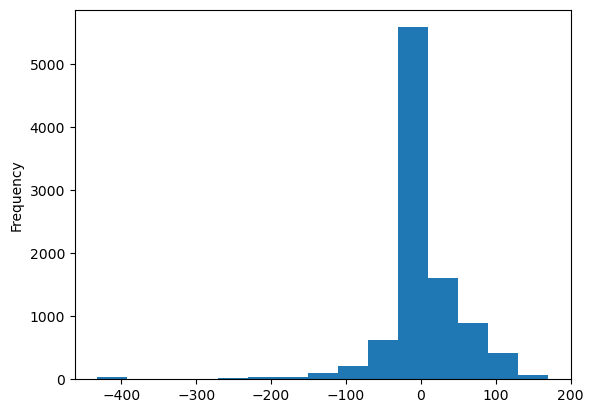

In [15]:
sc2_p2['max_med'].plot(kind = 'hist', bins = 15)

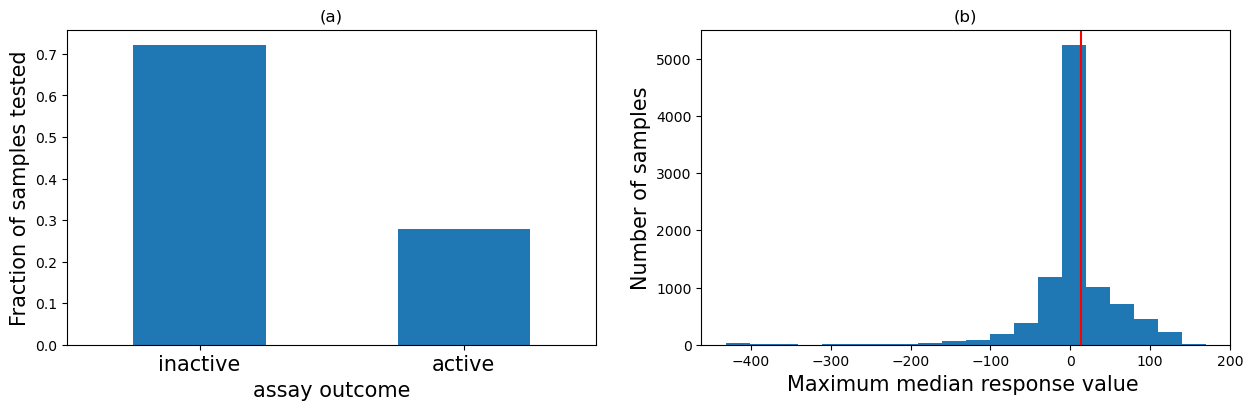

In [23]:

fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(221)
sc2_p2.hitc.value_counts(normalize = True).plot.bar()
plt.ylabel('Fraction of samples tested', fontsize = 15)
plt.xlabel('assay outcome', fontsize = 15)
plt.xticks(rotation = 360, fontsize = 15)
plt.title('(a)')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'inactive'
labels[1] = 'active'
ax.set_xticklabels(labels)

ax = fig.add_subplot(222)
sc2_p2['max_med'].plot(kind = 'hist',bins = 20)
plt.ylabel('Number of samples', fontsize = 15)
plt.xlabel('Maximum median response value ', fontsize = 15)
plt.title('(b)')
plt.axvline(x=14, color = 'r')
plt.savefig(figures_dir+'Figure1.png', dpi = 300);